In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from google.colab import drive


In [ ]:



uploaded = files.upload() #You should download the SGYC.xlsx file as a .csv and then upload it here

Saving SGYC2.csv to SGYC2.csv


In [ ]:
df = pd.read_csv("SGYC2.csv") #Creating a dataframe using the name of the file pasted above

In [ ]:
df.head()

,22104830- SGYC 2 ft 2025-09-05 16_07_05 PDT (Data PDT),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,#,Date-Time (PDT),"Temperature , °C","Light , lux",Depth
1,1,06/10/2025 11:40:15,23.98,2169.60,2
2,2,06/10/2025 11:41:15,24.19,673.92,2
3,3,06/10/2025 11:42:15,24.62,2996.48,2
4,4,06/10/2025 11:43:15,24.71,2394.88,2


In [ ]:
df.columns=['#', 'Date-Time (PDT)','Temperature , °C', 'light, lux', 'Depth']

In [ ]:
if '#' in df.columns:
  df.drop('#', axis=1, inplace=True)

df.drop(["Depth"], axis=1, inplace=True)
df.drop(0, inplace=True)

In [ ]:
df.head()

,Date-Time (PDT),"Temperature , °C","light, lux"
1,06/10/2025 11:40:15,23.98,2169.60
2,06/10/2025 11:41:15,24.19,673.92
3,06/10/2025 11:42:15,24.62,2996.48
4,06/10/2025 11:43:15,24.71,2394.88
5,06/10/2025 11:44:15,24.79,2458.24


#Data Manipulation

In [ ]:

df.columns = ['Date-Time', 'Temp°C', 'lux'] #Renaming columns for easier legibility

temp_list = df['Temp°C'].tolist() #Converting the columnto a list so that we can iterate over it


#len(temp_list)//60 799 hours


def group(temp_list,group_size):
  return [temp_list[i:i + group_size] for i in range(0, len(temp_list), group_size)] #Groups the list of temperatures into groups according to a set parameter (group_size)


sorted = group(temp_list,60)


sorted = pd.DataFrame(sorted) #Rows are entries, Columns are groups



In [ ]:
df['Date-Time'] = pd.to_datetime(df['Date-Time'], format="%m/%d/%Y %H:%M:%S")

# Take every 60th timestamp (1 per hour)
hour_labels = df['Date-Time'][::60].dt.strftime("%m/%d/%Y %H:%M:%S").tolist()
hour_labels.pop()
print(len(hour_labels))
print(hour_labels[:5])   # preview

799
['06/10/2025 11:40:15', '06/10/2025 12:40:15', '06/10/2025 13:40:15', '06/10/2025 14:40:15', '06/10/2025 15:40:15']


In [ ]:
sorted.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,23.98,24.19,24.62,24.71,24.79,24.84,24.92,24.92,24.97,24.97,...,22.52,22.35,22.13,21.96,21.79,21.62,21.45,21.28,21.10,20.85
1,20.72,20.59,20.42,20.42,20.37,20.33,20.33,20.33,20.33,20.37,...,20.25,20.29,20.33,20.37,20.46,20.55,20.63,20.63,20.72,20.68
2,20.72,20.72,20.72,20.72,20.68,20.68,20.68,20.68,20.63,20.55,...,20.42,20.42,20.29,20.20,20.12,20.07,20.03,20.07,20.20,20.25
3,20.33,20.33,20.46,20.55,20.63,20.76,20.80,20.85,20.93,20.98,...,20.98,20.93,20.89,20.85,20.85,20.80,20.76,20.72,20.76,20.68
4,20.63,20.59,20.50,20.46,20.37,20.29,20.16,20.07,19.99,19.99,...,20.20,20.29,20.33,20.29,20.37,20.37,20.37,20.42,20.46,20.50


In [ ]:
df = sorted.apply(pd.to_numeric, errors='ignore')


/tmp/ipython-input-401841359.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = sorted.apply(pd.to_numeric, errors='ignore')


#Returns average hourly temp

In [ ]:


def average_temp(df):
    averages = []

    # convert each column to numeric if possible
    numeric_df = df.apply(pd.to_numeric, errors='coerce')

    for i in range(len(numeric_df)):
        row = numeric_df.iloc[i].tolist()

        # keep only real numbers (drop NaN)
        numeric_values = [x for x in row if pd.notna(x)]

        avg = np.mean(numeric_values) if numeric_values else np.nan
        averages.append(avg)

    return averages

averageth = average_temp(df)

averageth.pop()

averages = pd.DataFrame(averageth)

averages.columns = ["Average temperature (celsius)"]



In [ ]:
averages.head()

,Average temperature (celsius)
0,24.097333
1,20.448333
2,20.427333
3,20.707333
4,20.336500


In [ ]:

def set_depth_location(depth, location, data_frame):
  # Create lists with the same length as the DataFrame index
  locat = list([location] * len(data_frame))
  dep = list([depth] * len(data_frame))

  data_frame["Location"] = locat #adding new columns
  data_frame["Depth (ft)"] = dep
  return data_frame

averages = set_depth_location("2 ft", "SGYC", averages)


averages["Date"] = hour_labels






In [ ]:
averages.head()

,Average temperature (celsius),Location,Depth (ft),Date
0,24.097333,SGYC,2 ft,06/10/2025 11:40:15
1,20.448333,SGYC,2 ft,06/10/2025 12:40:15
2,20.427333,SGYC,2 ft,06/10/2025 13:40:15
3,20.707333,SGYC,2 ft,06/10/2025 14:40:15
4,20.336500,SGYC,2 ft,06/10/2025 15:40:15


In [ ]:
drive.mount

In [ ]:
path ='4frame.csv'

averages.to_csv(path)

In [ ]:
plt_graph = averages.drop(columns=["Depth (ft)", "Location"])

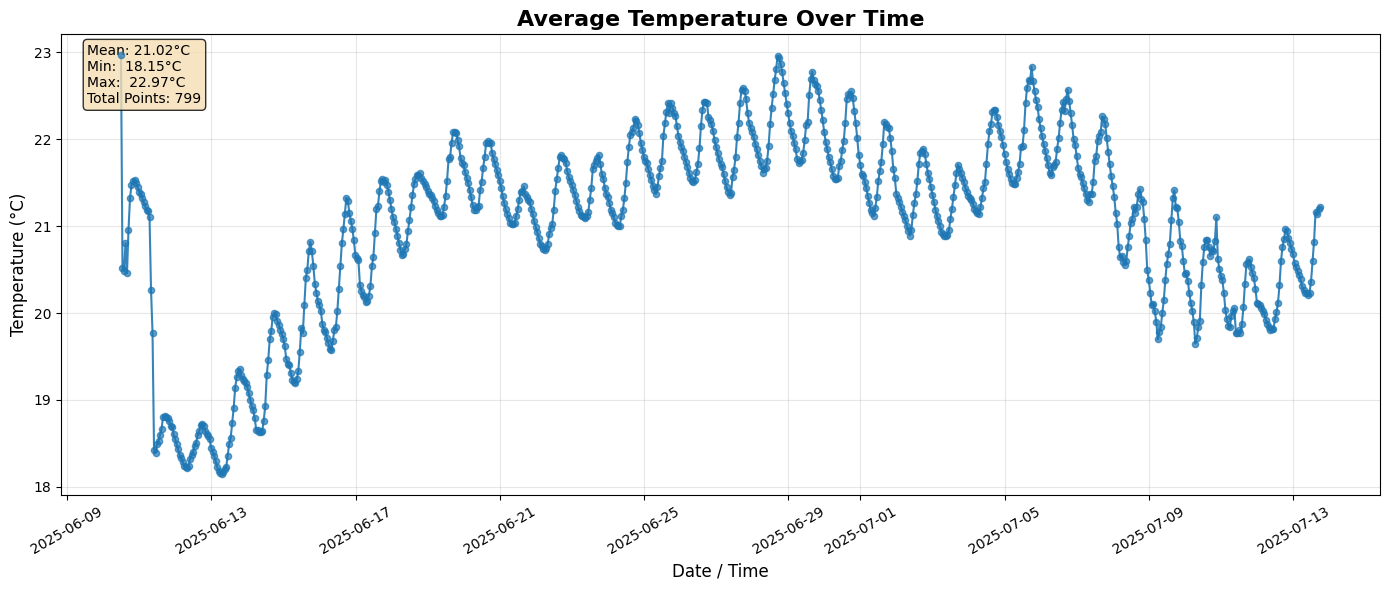

In [ ]:
def plot_hourly_temperature(df, title="Average Temperature Over Time"):

    # Ensure Date is datetime
    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"])

    x1 = df["Date"]
    y1 = df["Average temperature (celsius)"]

    x2, y2 = #Figure out this later - process another dataframe

    plt.figure(figsize=(14, 6))

    # Line + scatter
    plt.plot(x1, y1, linewidth=1.5, alpha=0.9)
    plt.scatter(x1, y1, s=20, alpha=0.7, zorder=5)

    # Labels + title
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Date / Time", fontsize=12)
    plt.ylabel("Temperature (°C)", fontsize=12)
    plt.grid(True, alpha=0.3)

    # Rotate dates to avoid overlap
    plt.xticks(rotation=30)

    # Stats box
    stats_text = (
        f"Mean: {y.mean():.2f}°C\n"
        f"Min:  {y.min():.2f}°C\n"
        f"Max:  {y.max():.2f}°C\n"
        f"Total Points: {len(df)}"
    )

    plt.text(
        0.02, 0.98, stats_text,
        transform=plt.gca().transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()


plot_hourly_temperature(plt_graph)

#Define Model

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

#Converting the date column to date time format
averages['Date'] = pd.to_datetime(averages['Date'])

# Extract date-time components for easier one hot encoding + pattern learning
averages['Hour'] = averages['Date'].dt.hour
averages['Minute'] = averages['Date'].dt.minute
averages['Second'] = averages['Date'].dt.second
averages['Day'] = averages['Date'].dt.day
averages['Month'] = averages['Date'].dt.month

#making it easier to process


# Define features and target
X = averages[['Location', 'Depth (ft)', 'Hour', 'Minute', 'Second', 'Day', 'Month']]
y = averages['Average temperature (celsius)']

# One-hot encode only the categorical columns (non-numerical)
X = pd.get_dummies(X, columns=['Location', 'Depth (ft)'], drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1
model = RandomForestRegressor(n_estimators=28, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R_squared:", r2_score(y_test, y_pred))



MAE: 0.08207518749999955
R_squared: 0.9902857604036865


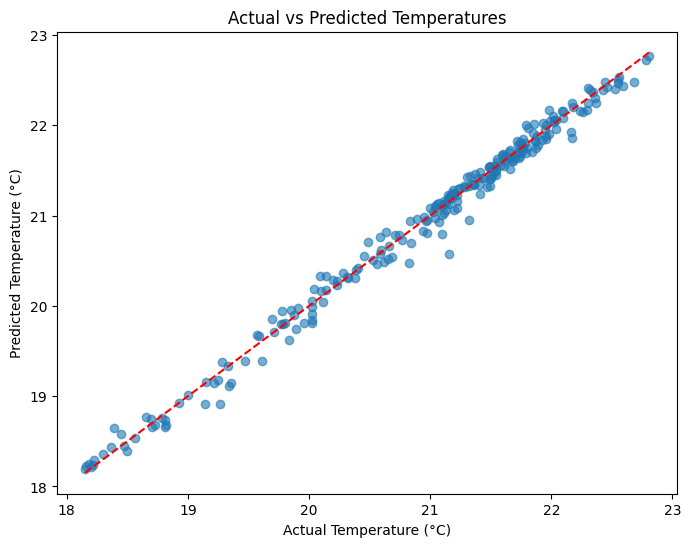

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperatures")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


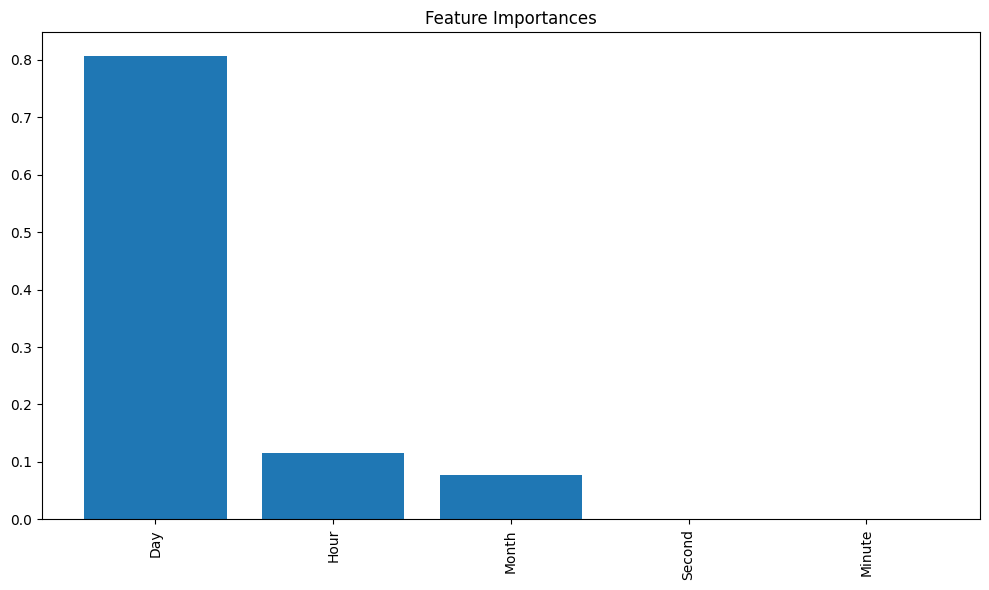

In [ ]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


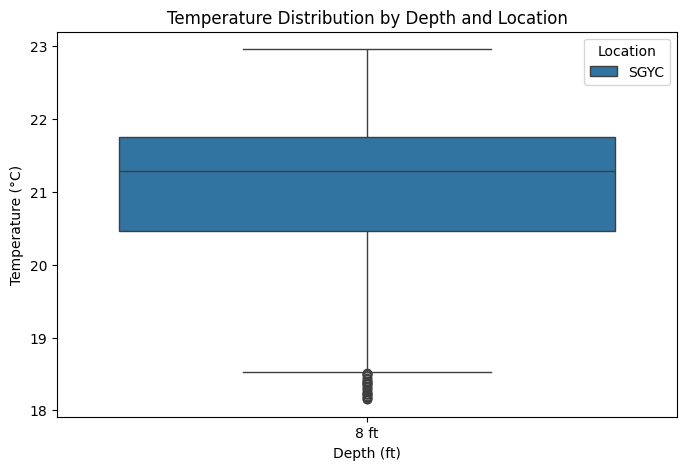

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Depth (ft)', y='Average temperature (celsius)', hue='Location', data=averages)
plt.title("Temperature Distribution by Depth and Location")
plt.xlabel("Depth (ft)")
plt.ylabel("Temperature (°C)")
plt.legend(title="Location")
plt.show()
